## Use jupyter-flex for monitoring dashboards

https://jupyter-flex.danielfrg.com/

In [1]:
from vetiver import VetiverModel, vetiver_pin_write
from vetiver.data import mtcars
from sklearn.linear_model import LinearRegression
from pins import board_folder

model_board = board_folder("pins-py", allow_pickle_read=True)
car_mod = LinearRegression().fit(mtcars.drop(columns="mpg"), mtcars["mpg"])
v = VetiverModel(car_mod, model_name = "cars_mpg", 
                 prototype_data = mtcars.drop(columns="mpg"))
vetiver_pin_write(model_board, v)

Model Cards provide a framework for transparent, responsible reporting. 
 Use the vetiver `.qmd` Quarto template as a place to start, 
 with vetiver.model_card()
Writing pin:
Name: 'cars_mpg'
Version: 20230328T104639Z-dd3e7


In [2]:
import vetiver

import pandas as pd
from sklearn import metrics
from datetime import timedelta

cars = pd.read_csv("https://vetiver.rstudio.com/get-started/new-cars.csv")
original_cars = cars.iloc[:14, :].copy()
original_cars["preds"] = v.model.predict(
    original_cars.drop(columns=["date_obs", "mpg"])
)

metric_set = [metrics.mean_absolute_error, 
  metrics.mean_squared_error, 
  metrics.r2_score]
  
td = timedelta(weeks = 1)

original_metrics = vetiver.compute_metrics(
    data = original_cars, 
    date_var = "date_obs", 
    period = td, 
    metric_set = metric_set, 
    truth = "mpg", 
    estimate = "preds"
)

model_board.pin_write(original_metrics, "tree_metrics", type = "csv")
original_metrics

Writing pin:
Name: 'tree_metrics'
Version: 20230328T104639Z-950cc


,index,n,metric,estimate
0,2022-03-24,7,mean_absolute_error,1.784605
1,2022-03-24,7,mean_squared_error,4.158348
2,2022-03-24,7,r2_score,0.782879
3,2022-03-31,7,mean_absolute_error,1.458550
4,2022-03-31,7,mean_squared_error,3.370279
5,2022-03-31,7,r2_score,0.900166


In [3]:
# dates overlap with existing metrics:
new_cars = cars.iloc[7:, :].copy()
new_cars["preds"] = v.model.predict(
    new_cars.drop(columns=["date_obs", "mpg"])
)

new_metrics = vetiver.compute_metrics(
    data = new_cars, 
    date_var = "date_obs", 
    period = td, 
    metric_set = metric_set, 
    truth = "mpg", 
    estimate = "preds"
)
                    
vetiver.pin_metrics(
    model_board, 
    new_metrics, 
    "tree_metrics", 
    overwrite = True
)

Writing pin:
Name: 'tree_metrics'
Version: 20230328T104639Z-45ee7


,index,n,metric,estimate
0,2022-03-24,7,mean_absolute_error,1.784605
1,2022-03-24,7,mean_squared_error,4.158348
2,2022-03-24,7,r2_score,0.782879
3,2022-03-31,7,mean_absolute_error,1.458550
4,2022-03-31,7,mean_squared_error,3.370279
5,2022-03-31,7,r2_score,0.900166
6,2022-04-07,7,mean_absolute_error,2.628320
7,2022-04-07,7,mean_squared_error,10.673068
8,2022-04-07,7,r2_score,0.826315
9,2022-04-14,7,mean_absolute_error,1.847171


# page 1

## column 1

#### Monitoring

markdown cell

In [4]:
monitoring_metrics = model_board.pin_read("tree_metrics")
p = vetiver.plot_metrics(df_metrics = monitoring_metrics)
p.update_yaxes(matches=None)
p.show()

# Custom plot

<AxesSubplot: >

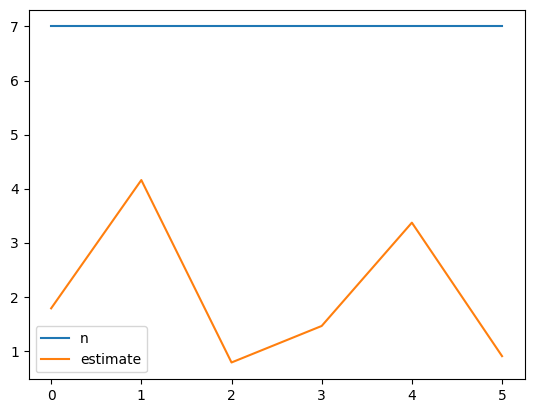

In [5]:
monitoring_metrics.plot()

# iframe

In [ ]:
from IPython.display import IFrame
IFrame('https://colorado.posit.co/rsc/content/941993f0-9290-488c-a815-efa107808693', width=750, height=350)